In [5]:
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd


In [7]:
# Define image dimensions
IMG_HEIGHT, IMG_WIDTH = 64, 64
DATASET_PATH = "traffic_signs"

In [10]:

# Load CSV files
train_df = pd.read_csv("C:\AAA\datamites projects\PRAICP-1002-TrafSignDetc\Train.csv")
test_df = pd.read_csv("C:\AAA\datamites projects\PRAICP-1002-TrafSignDetc\Test.csv")

# Display first few rows
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  

Test Dataset:
   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57 

In [13]:

# Load the CSV file
train_df = pd.read_csv("C:\AAA\datamites projects\PRAICP-1002-TrafSignDetc\Train.csv")

# Print column names
print(train_df.columns)


Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')


In [15]:
X_train, y_train = load_images_from_csv(train_df, "traffic_signs/", "Path", "ClassId")
X_test, y_test = load_images_from_csv(test_df, "traffic_signs/", "Path", "ClassId")


In [17]:
print(f"y_train size: {len(y_train)}")
print(f"Unique labels in y_train: {set(y_train)}")


y_train size: 0
Unique labels in y_train: set()


Create a Mapping Dictionary

In [57]:
# Define a dictionary mapping class indices to actual labels
class_labels = {
    0: "Speed Limit 20", 1: "Speed Limit 30", 2: "Speed Limit 50", 3: "Speed Limit 60",
    4: "Speed Limit 70", 5: "Speed Limit 80", 6: "Speed Limit 90", 7: "Speed Limit 100",
    8: "Speed Limit 120", 9: "No Vehicles", 10: "No Vehicles", 11:"Crossroads or Intersection",
    12: "Priority Road", 13: "Yield or Give Way" , 14: "Stop", 15: "No entry",
    16: "No Trucks", 17: "No Entry", 18: "General Danger or Other Danger", 19: "Sharp Turn to the Left",
    20: "Sharp Turn to the right" , 21: "Double Bend", 22: "Uneven Road or Bumps", 23: "Slippery Road",
    24: "Slippery Road", 25: "Roadworks or Men at Work", 26: "Traffic Signals Ahead", 27: "Pedestrian Crossing",
    28: "Children Crossing", 29: "Cycle Crossing or Bicycle Crossing", 30: "Risk of Ice or Slippery Road due to Ice/Snow", 31: "Wild Animals Crossing",
    32: "End of all Restrictions" , 33: "Mandatory Right Turn Ahead", 34: "Mandatory Right Left Ahead" , 35: "Mandatory Straight Ahead",
    36: "Straight Ahead or Right Turn Only", 37: "Straight Ahead or Left Turn Only", 38: "Mandatory Keep Left", 39: "Mandatory Keep Right" ,
    40: "Roundabout", 41: "End of Overtaking Prohibition", 42: "End of Overtaking Prohibition for Trucks"
}


 Load and Preprocess the Dataset

In [44]:
model.save("C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/traffic_sign_model.h5")


In [53]:
import os
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical

# Define image size
IMG_HEIGHT, IMG_WIDTH = 64, 64  

# Define dataset paths
TRAIN_CSV_PATH = "C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/Train.csv"
TEST_CSV_PATH = "C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/Test.csv"
BASE_IMAGE_PATH = "C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/"

# Load CSV files
train_df = pd.read_csv(TRAIN_CSV_PATH)
test_df = pd.read_csv(TEST_CSV_PATH)

# Print column names to verify structure
print("Train Columns:", train_df.columns)
print("Test Columns:", test_df.columns)

# Function to load images from CSV file
def load_images_from_csv(csv_df, base_path):
    images = []
    labels = []
    
    for _, row in csv_df.iterrows():
        img_path = os.path.join(base_path, row["Path"])  # Construct full image path
        
        # Debug: Check if file exists
        if not os.path.exists(img_path):
            print(f"⚠️ File not found: {img_path}")
            continue
        
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"⚠️ Could not read image: {img_path}")
            continue  # Skip unreadable images
        
        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))  # Resize
        img = img / 255.0  # Normalize
        images.append(img)
        labels.append(row["ClassId"])  # Get label
    
    return np.array(images), np.array(labels)

# Load training and testing data
X_train, y_train = load_images_from_csv(train_df, BASE_IMAGE_PATH)
X_test, y_test = load_images_from_csv(test_df, BASE_IMAGE_PATH)

# Verify dataset loading
print(f"✅ Loaded {len(y_train)} training images and {len(y_test)} testing images.")

# Ensure labels exist
if len(set(y_train)) == 0:
    print("⚠️ No labels found in y_train. Check ClassId column.")

# Convert labels to one-hot encoding
num_classes = len(set(y_train))  
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(f"✅ Final dataset shape: X_train={X_train.shape}, y_train={y_train.shape}")


Train Columns: Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')
Test Columns: Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')
✅ Loaded 39209 training images and 12630 testing images.
✅ Final dataset shape: X_train=(39209, 64, 64, 3), y_train=(39209, 43)


Build a CNN model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,747 (2.63 MB)

 Trainable params: 688,747 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 227s 184ms/step - accuracy: 0.3506 - loss: 2.3386 - val_accuracy: 0.8724 - val_loss: 0.4529
Epoch 2/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 185s 150ms/step - accuracy: 0.8152 - loss: 0.5569 - val_accuracy: 0.9465 - val_loss: 0.2115
Epoch 3/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 199s 162ms/step - accuracy: 0.8901 - loss: 0.3233 - val_accuracy: 0.9509 - val_loss: 0.1740
Epoch 4/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 172s 140ms/step - accuracy: 0.9221 - loss: 0.2307 - val_accuracy: 0.9632 - val_loss: 0.1473
Epoch 5/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 169s 138ms/step - accuracy: 0.9505 - loss: 0.1516 - val_accuracy: 0.9614 - val_loss: 0.1549
Epoch 6/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 180s 147ms/step - accuracy: 0.9562 - loss: 0.1364 - val_accuracy: 0.9722 - val_loss: 0.1234
Epoch 7/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 178s 145ms/step - accuracy: 0.9652 - loss: 0.1024 - val_accuracy: 0.9759 - val_loss: 0.1148
Epoch 8/20
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 194s 158ms/step - ac

Evaluate Model Performance

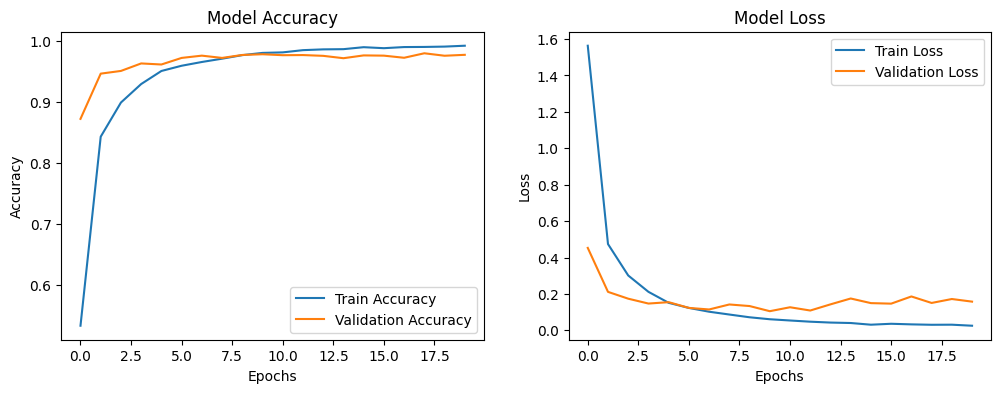

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


Test on New Images

In [60]:
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    class_idx = np.argmax(prediction)
    
    print(f"Predicted Traffic Sign: {class_idx}")

# Test with an image from your dataset
sample_image_path = "C:\AAA\datamites projects\PRAICP-1002-TrafSignDetc\sample.png"  # Change this to an actual  image
predict_image(sample_image_path)

predict_traffic_sign("C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/sample.png")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Traffic Sign: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted Traffic Sign: Priority Road


Save and Load the Model

In [54]:
# Save the trained model
model.save("C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/traffic_sign_model.h5")

# Load model when needed
from tensorflow.keras.models import load_model
model = load_model("C:/AAA/datamites projects/PRAICP-1002-TrafSignDetc/traffic_sign_model.h5")
